In [1]:
import os
import numpy as np

BBO_exp_dict = {
    "BBO MBTR/RBF init calc": os.environ["DATA"] + "/07_BBO/04_BBO_chem/04_HOMO/01.05_test_HOMO_new_parameters_MBTR_RBF_not_noise_based/",
    "BBO MBTR/RBF (prev. exp.)": os.environ["DATA"] + "/07_BBO/04_BBO_chem/04_HOMO/01.07_test_HOMO_new_parameters_MBTR_RBF_not_noise_based_init_pop_zero/",
    "BBO SC/DP init calc": os.environ["DATA"] + "/07_BBO/04_BBO_chem/04_HOMO/01.08_test_HOMO_new_parameters_SC_DP_not_noise_based/",
    "BBO SC/DP (prev. exp.)": os.environ["DATA"] + "/07_BBO/04_BBO_chem/04_HOMO/01.10_test_HOMO_new_parameters_SC_DP_not_noise_based_init_pop_zero/",
    
    "BBO MBTR/RBF init calc 30 steps": os.environ["DATA"] + "/07_BBO/04_BBO_chem/04_HOMO/01.15_test_HOMO_new_parameters_MBTR_RBF_not_noise_based_30_evo_steps/",
    "BBO MBTR/RBF (prev. exp.) 30 steps": os.environ["DATA"] + "/07_BBO/04_BBO_chem/04_HOMO/01.17_test_HOMO_new_parameters_MBTR_RBF_not_noise_based_init_pop_zero_30_evo_steps/",
    "BBO SC/DP init calc 30 steps": os.environ["DATA"] + "/07_BBO/04_BBO_chem/04_HOMO/01.18_test_HOMO_new_parameters_SC_DP_not_noise_based_30_evo_steps/",
    "BBO SC/DP (prev. exp.) 30 steps": os.environ["DATA"] + "/07_BBO/04_BBO_chem/04_HOMO/01.20_test_HOMO_new_parameters_SC_DP_not_noise_based_init_pop_zero_30_evo_steps/",
}

EvoMol_exp_dict = {
    "EvoMol": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/01.01_EvoMol_from_methane_optim_HOMO_rdkit_nocache"
}

sub_experiments_names = [str(i) for i in range(1, 11)]

ECDF_TARGETS = np.arange(-10, -1, 0.01)
ERT_TARGETS = np.arange(-10, -1, 0.5)

In [2]:
groups = [
    
    [
        "Initialization = zero",
        ["BBO MBTR/RBF (prev. exp.)", "BBO SC/DP (prev. exp.)", "BBO MBTR/RBF (prev. exp.) 30 steps", 
         "BBO SC/DP (prev. exp.) 30 steps", "EvoMol"],
        {
            "BBO MBTR/RBF (prev. exp.)": "BBO MBTR/RBF (10 steps)",
            "BBO SC/DP (prev. exp.)": "BBO SC/DP (10 steps)",
            "BBO MBTR/RBF (prev. exp.) 30 steps": "BBO MBTR/RBF (30 steps)",
            "BBO SC/DP (prev. exp.) 30 steps": "BBO SC/DP (30 steps)"
        },
        [0, 0, 1, 1, 2],
        [None, None, None, None, None],
        (-6, -2)
    ],
    [
        "Initialization = EI calculation",
        ["BBO MBTR/RBF init calc", "BBO SC/DP init calc", "BBO MBTR/RBF init calc 30 steps", 
         "BBO SC/DP init calc 30 steps", "EvoMol"],
        {
            "BBO MBTR/RBF init calc": "BBO MBTR/RBF (10 steps)",
            "BBO SC/DP init calc": "BBO SC/DP (10 steps)",
            "BBO MBTR/RBF init calc 30 steps": "BBO MBTR/RBF (30 steps)",
            "BBO SC/DP init calc 30 steps": "BBO SC/DP (30 steps)"
        },
        [0, 0, 1, 1, 2],
        [None, None, None, None, None],
        (-6, -2)
    ]
    
#     [
#         "Exploration parameter xi",
#         ["BBO MBTR/RBF noise based + init calc", "BBO MBTR/RBF noise based + init calc (xi=0)", 
#          "BBO SC/DP noise based + init calc", "BBO SC/DP noise based + init calc (xi=0)", "EvoMol"],
#         {},
#         [0, 1, 0, 1, 2],
#         [None, None, None, None, None],
#         (-6, -2) # y limits
#     ],
#     [
#         "Merit optimization depth",
#         ["BBO MBTR/RBF noise based + init calc", "BBO MBTR/RBF noise based + init calc (30 steps)",
#          "BBO SC/DP noise based + init calc", "BBO SC/DP noise based + init calc (30 steps)", "EvoMol"],
#         {
#             "BBO MBTR/RBF noise based + init calc": "BBO MBTR/RBF noise based + init calc (10 steps)",
#             "BBO SC/DP noise based + init calc": "BBO SC/DP noise based + init calc (10 steps)"
#         },
#         [0, 1, 0, 1, 2],
#         [None, None, None, None, None],
#         (-6, -2) # y limits
#     ],
]

In [3]:
from bbomol.postprocessing.postprocessing import load_complete_input_results

results_dict = load_complete_input_results(BBO_exp_dict, EvoMol_exp_dict, sub_experiments_names, 
                                           include_dataset_init_step=True)


In [4]:
from bbomol.postprocessing import plot
plot.figsize = (7, 3)
from IPython.display import display, HTML


for g in groups:
    
    display(HTML("<h3>" + g[0] +"</h3>"))
    
    plot.plot_best_so_far(results_dict, metric="both", exp_list_plot=g[1], plot_name=g[0], labels_dict=g[2],
                          classes_dashes=g[3], classes_markers=g[4], ylim=g[5], xlim=(0, 1000),
                          plot_last_common_data_all_runs=True)

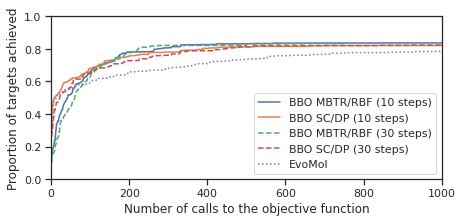

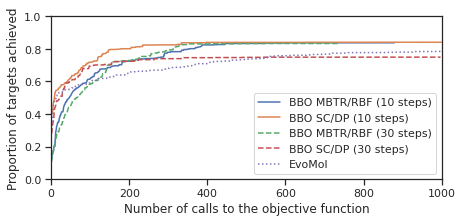

In [5]:

for g in groups:
    
    display(HTML("<h3>" + g[0] +"</h3>"))
    
    plot.plot_ecdf(results_dict, ecdf_targets=ECDF_TARGETS, exp_list_plot=g[1], plot_name=g[0], 
                   labels_dict=g[2], classes_dashes=g[3], classes_markers=g[4], ylim=(0, 1), xlim=(0, 1000))

In [6]:
for g in groups:
    
    display(HTML("<h3>" + g[0] +"</h3>"))
    
    plot.display_ert(results_dict, ert_targets=ERT_TARGETS, exp_list_plot=g[1], 
                     labels_dict=g[2])

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  -6.5  \
0  BBO MBTR/RBF (10 steps)      1     1     2     5    10    15    17    21   
1     BBO SC/DP (10 steps)      1     1     1     1     2     2     2     5   
2  BBO MBTR/RBF (30 steps)      1     1     2     8    14    22    26    38   
3     BBO SC/DP (30 steps)      1     1     1     1     1     5     7     7   
4                   EvoMol      2     2     2     2     2     2     2     4   

   -6.0  -5.5  -5.0  -4.5  -4.0  -3.5  -3.0  -2.5  -2.0  -1.5  
0    33    44    64    84   111   180   197  1060   inf   inf  
1     7    14    30    54    97   177   535  1063   inf   inf  
2    50    61    79   106   140   160   193  1376   inf   inf  
3    16    70    74   105   153   194   423  1415   inf   inf  
4     5    10    46   170   235   523  1186   inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  -6.5  \
0  BBO MBTR/RBF (10 steps)      1     1     2     6    10    16    18    21   
1     BBO SC/DP (10 steps)      1     1     1     1     1     2     2     4   
2  BBO MBTR/RBF (30 steps)      1     1     2     8    12    20    27    37   
3     BBO SC/DP (30 steps)      1     1     1     1     1     4     6     9   
4                   EvoMol      2     2     2     2     2     2     2     4   

   -6.0  -5.5  -5.0  -4.5  -4.0  -3.5  -3.0  -2.5  -2.0  -1.5  
0    35    50    69   115   180   247   260  1237   inf   inf  
1     6     7    20    52    85   136   158   517   inf   inf  
2    49    71    81   123   180   210   235  1199   inf   inf  
3    26    36    68    74    89   127   145  2140   inf   inf  
4     5    10    46   170   235   523  1186   inf   inf   inf